# **Boost Converters**

**Author: Melika Dehestani**

**Gmail:** dehestanimelika2004@gmail.com 

**Fall 2024**

# **Introduction**
Boost converters are a type of DC-DC switching converter that efficiently increase (step-up) the input voltage to a higher output voltage. It is a class of switched-mode power supply (SMPS) containing at least two semiconductors, a diode and a transistor, and at least one energy storage element; a capacitor, inductor, or the two in combination.  By storing energy in an inductor during the switch-on phase and releasing it to the load during the switch-off phase, this voltage conversion is made possible. Power electronics applications requiring a greater output voltage than the input source, in particular, depend on boost converters.

The newest switcher, the flyback converter, actually evolved from the boost regulator. Because it delivers a fixed amount of power to the load regardless of load impedance (except for short circuits), the boost regulator is the designer's first choice in photoflash and capacitive-discharge (CD) automotive ignition circuits to recharge the capacitive load. It also makes a good battery charger.

# **Principle of operation**
The principle of operation of a boost converter is to store energy in an inductor and then release it to the load at a higher voltage than the input voltage. This is achieved by: 
-  Storing energy:
    When the switch is on, current flows through the inductor and creates a magnetic field, storing energy. 

-  Releasing energy:
    When the switch is off, the magnetic field collapses, inducing current through the circuit. This current is redirected through the diode and stored in the output capacitor. 

-  Smoothing the output voltage:
    The output capacitor smooths the output voltage to deliver a stable supply to the load. 
    
The key principle behind a boost converter is that an inductor resists changes in current by storing or releasing energy in its magnetic field. 

#  **Simple boost converter schematic (switch closed)**
The code below shows the schematic of a simple boost converter using schemdraw, which consists of a source of DC power supply E, a switch S (typically a MOSFET or IGBT), a diode D, low frequency bandpass LC filter and load R:

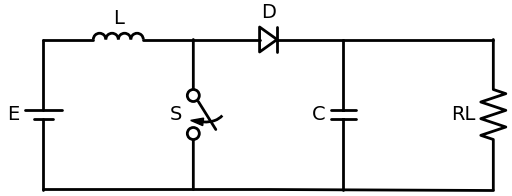

In [ ]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    battery=elm.BatteryCell().reverse().up().label("E")
    elm.Inductor().right().label("L")
    d.push()
    elm.Switch(action='close').down().label("S")
    d.pop()
    elm.Diode().right().label("D")
    d.push()
    elm.Capacitor().down().label("C")
    d.pop()
    elm.Line().right()
    elm.Resistor().down().label("RL")
    elm.Line().left().tox(battery.start)

# **Closing the switch**
During this stage, the input voltage (Vin) which is E in the drawing above is applied across the inductor (L), so if we are comparing this state with the state that the switch is open our current has increased therefore the inductor is storing energy and the polarity of the inductor shall be positive on the left side and negative on the right side also we see that the current through the inductor increases linearily.

 The energy stored in the inductor builds up, and the diode (D) is reverse-biased, preventing current flow to the load. The inductor current can be expressed as:

$$ ΔI_L = \frac{V_{in}}{L}.t_{on} $$

where ΔIL is the change in inductor current, L is the inductance, and ton is the duration of the switch-on period.

Under the influence of voltage E, the inductor current linearly increases from its minimum to maximum value ,like the diagram below:

   ![title](pics/diagram.png)

## **Simple boost converter schematic (switch opened)**
The schematic below shows how the boost converter will be if the switch is opened: 

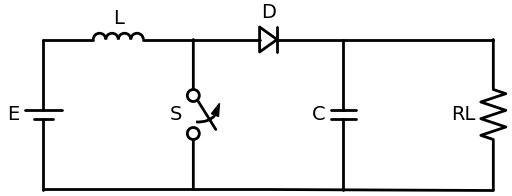

In [3]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    battery=elm.BatteryCell().reverse().up().label("E")
    elm.Inductor().right().label("L")
    d.push()
    elm.Switch(action='open').down().label("S")
    d.pop()
    elm.Diode().right().label("D")
    d.push()
    elm.Capacitor().down().label("C")
    d.pop()
    elm.Line().right()
    elm.Resistor().down().label("RL")
    elm.Line().left().tox(battery.start)

# **Opening the switch**
When the switch S1 opens, the current flow decreases; this is due to the fact that current can only go through the diode and then the load. When the current decreases the magnetic field of the inductor collapses hence energy is realsed. This causes the polarity of the inductor to change and get reversed, so now the inductor is in series with the battery. The voltage across the load is now greater than the battery because the inductors voltage and the battery are added together. This added voltage now charges the capacitor.

During this period, the voltage across the inductor (VL) is equal to the difference between the output voltage (Vout) and the input voltage (Vin). The inductor current decreases linearly as the energy is transferred to the load, and the equation for the inductor current becomes:

$$ ΔI_L = \frac{V_{out}-V_{in}}{L}.t_{off} $$

where toff is the duration of the switch-off period.

By equating the inductor current equations for both stages and rearranging the terms, we can derive the voltage conversion relationship for the boost converter using the duty cycle:

$$ V_{out} = \frac{V_{in}}{1-D} $$

This equation shows that the output voltage can be controlled by adjusting the duty cycle of the switching waveform, allowing for a higher output voltage than the input voltage. 

As the switch is constantly turned on and off the capacitors voltage also increases, this voltage continues to increase until it reaches an equilibrium state; This is when the rate the inductor charges the capacitor equals the rate the capacitor discharge itself through the load. In this moment we have our maximum voltage.

# **What is the purpose of the diode?**
In the previous section we said how the capacitors voltage exceeds the batterys, if the diode was not there the capacitor would have discharged through the battery until it reached a state of equilibrium (the voltages become the same). Since the diode is reversed biased in this view it prevents current from flowing through the battery so the capacitors current must flow through the load. In conclusion the diodes purpose is to increase the output volatge across the load.

# **How current decreases in a boost converter**
We learned how the voltage increases in a boost converter, overall power should remain the same thus the current should decrease. We are now going to analyse how current decrases.

When the switch is closed some of the current flows through inductor through the diode and lastly through the load, but a good portion of the current flows through the switch. Ultimatly the net current decreases as some of the current flows back to the battery and so this is why we say boost converters step up the voltage and step down the current.

# **Ripple in current**
During ton using KVL we have:

$$ V_L = E $$

$$ L\frac{dI_L}{dt} = E $$

$$ L\int_{I_{min}}^{I_{max}} di_L = E \int_{0}^{t_{on}} $$

So this gives the value of ΔI is:

$$ ΔI_L = \frac{E.D}{f.L} $$

This is the ripple in current relation with duty cycle and input voltage.

# **Average output voltage**
The diagram below shows the waveform of diffrent components of a boost circuit:

   ![title](pics/pic.jpg)



During toff using KVL and the diagram above we have:

$$ V_L = E - V_{out} $$

$$ L\frac{dI_L}{dt} = E - V_{out} $$

$$ L\int_{I_{max}}^{I_{min}} di_L = (E- V_{out}) \int_{t_{on}}^{T} $$

$$ -L ΔI_L = (E- V_{out})(T-t_{on}) $$

By using the relation we calculated for the ripple current and duty cycle we rewrite the equation above:

$$ -L \frac{E.D}{f.L} = (E- V_{out})(1-D)T $$

$$ V_{out} = \frac{V_{in}}{1-D} $$

In cocnlusion we see our output has been stepped up.


# **Average load current**
For lossless conversion:

$$ P_i = P_out $$

$$ E.I_i = V_{out}.I_{out} $$

Replacing Vout with the equation in the part before we derive the relation between input and output current:

$$ I_{out} = (1-D) I_i $$

We see in our result that current is bucked or stepped down.

# **How to increase output voltage and efficiency**
According to the calculations we have made, there are two options for increasing our output voltage:

-  We can increase the inductors value(L)

-  We can increase the current rate(dIl/dt), this means instead of using a mechanical switch we can use a MOSFET or transistor to act as a fast acting switch and we can control the rate of its on and off by using an AC signal; as we change the frequency we can increase the rate.

In a boost converter, efficiency is a crucial parameter determining how effectively it transfers power from input to output. The efficiency (η) of a boost converter can be expressed as the ratio of output power (Pout) to input power (Pin):

$$ η = \frac{P_{out}}{P_{in}} $$

The losses in a boost converter can be attributed to several factors, which will be discussed in this section.

-  Conduction Losses: The resistance of circuit elements like the inductor, switch (MOSFET), and diode causes conduction losses. These losses are directly related to the resistance of the components and the current that flows through them. By choosing parts with lower resistances and improving the converter's design for low current flow, conduction losses can be reduced.

-  Switching Losses: When a MOSFET switches between its on and off states, switching losses occur. During these transitions, the switch is experiencing both voltage and current, which results in power loss. The MOSFET's on-state resistance, drain-to-source voltage, and switching frequency all influence the overall switching loss. A MOSFET with low on-state resistance and quick switching periods should be used to reduce switching losses.

-  Diode Reverse Recovery Losses: A diode experiences reverse recovery as it transitions from the conducting state to the blocking state. Power loss occurs as a result of the diode briefly conducting current in the opposite direction during this process. A Schottky diode or other diode with a short reverse recovery time should be chosen to reduce these losses.

-  Magnetic Core Losses: The alternating magnetic field inside the inductor core results in energy dissipation in the form of heat and causes inductor core losses. The core material, operation frequency, and magnetic flux density all affect these losses. To reduce core losses, an appropriate core material should be selected, and the inductor design should be optimized to minimize the magnetic flux density.

-  Capacitor Losses: Equivalent series resistance (ESR) of the output capacitor is the principal cause of capacitor losses. These losses lead to the production of heat and a decline in general efficiency. These losses can be reduced by using capacitors with a low ESR.

# **Applications and Examples**
Boost converters are widely used in various applications due to their ability to step up the input voltage. This section will discuss some common applications and examples of boost converters in real-world scenarios.

-  Power Supplies: Boost converters are utilized in power supplies to produce a stable, higher output voltage from a lower input voltage source, making them useful for portable devices and battery-operated systems where input voltage may vary due to battery discharge or other factors. Examples include laptop chargers, USB power adapters, and portable power banks.

-  LED Lighting: In LED lighting systems, boost converters are used to maintain a constant current to the LED string, ensuring consistent brightness even when the input voltage fluctuates. This is particularly relevant in automotive applications, where the vehicle's electrical system voltage can vary, and the boost converter ensures stable LED illumination.

-  Solar Power Systems: Boost converters play a critical role in solar power systems,, particularly in maximum power point tracking (MPPT) controllers. The converter adjusts its output voltage to extract the maximum power from the solar panels, stepping up the panel voltage to charge batteries or supply power to the electrical grid.

-  Electric Vehicles: Boost converters are used in electric vehicles to increase the voltage from the battery pack to a higher voltage level required for various electrical components such as the traction motor, air conditioning system, or power steering. This enables efficient power delivery and optimal vehicle performance.

-  Telecommunications: Boost converters are employed in telecommunications applications to produce stable, higher output voltages from lower input voltages, ensuring the reliable operation of radio frequency (RF) transmitters, base stations, and other communication equipment.

-  Sensor Systems: Boost converters are commonly used in sensor systems to provide a stable voltage supply for analog-to-digital converters (ADCs) and other sensitive electronic components. This is especially important in sensor systems operating in environments with variable input voltage conditions, such as remote monitoring systems powered by batteries or energy harvesting devices.


# **Conclusion**
In conclusion, boost converters play a critical role in modern electrical engineering by providing efficient solutions for stepping up voltage levels in a wide range of applications. Through the analysis of their principles, components, and performance metrics, we have demonstrated their importance in fields such as renewable energy, consumer electronics, and automotive systems. By understanding the design and operational parameters, we can optimize boost converters to achieve higher efficiency, reliability, and cost-effectiveness, which are crucial for advancing technology and meeting the growing energy demands of the future.

## **Sources** 
-  https://laboratorypatternrecognition.github.io/CircuitElectronics/Circuit_Electronics/DiodeApplication.html
-  https://www.youtube.com/watch?v=9QM55r5fnUk
-  https://www.monolithicpower.com/en/learning/mpscholar/power-electronics/dc-dc-converters/boost-converters?srsltid=AfmBOooo0TzxD694M7xoQe3DOAd1AnD9CHNNRxqL5aKus5Vyk8ymB7aI
-  https://en.wikipedia.org/wiki/Boost_converter
-  https://www.youtube.com/watch?v=Find0OQYQtE
-  Voltage Regulator Circuit Manual, By Robert J. Traister
-  https://www.ti.com/lit/an/snva731/snva731.pdf?ts=1735902409283&ref_url=https%253A%252F%252Fwww.google.com%252F#:~:text=The%20boost%20converter%20is%20used,the%20boost%20and%20buck%20converters. 